<a href="https://colab.research.google.com/github/SaiButhongyou/229352-StatisticalLearning/blob/main/Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [139]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

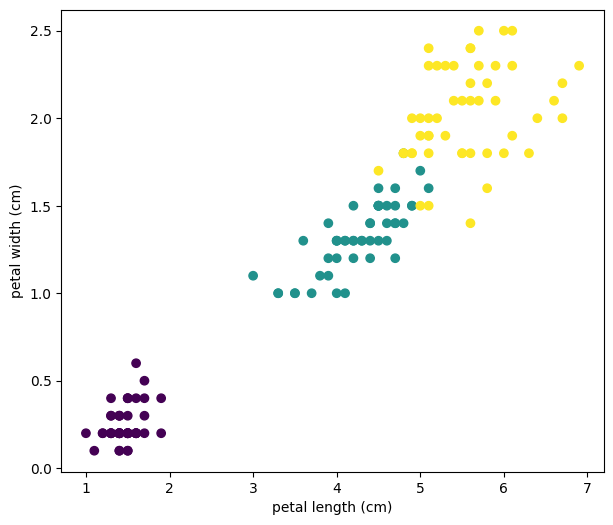

In [140]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [141]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [142]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

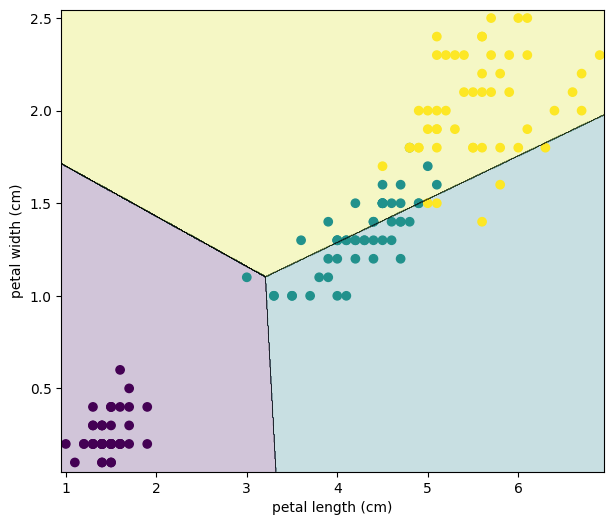

In [143]:
linesvm=LinearSVC(C=0.1)
linesvm.fit(X_train, y_train)
plot_decision_boundary(linesvm,X,y)

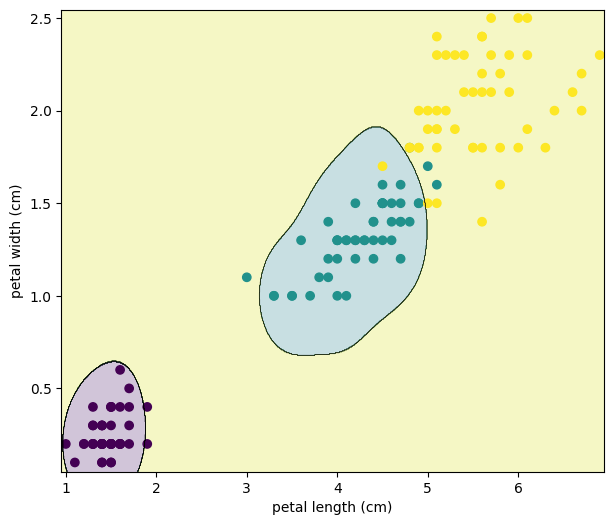

In [144]:
#TODO

svm = SVC(C=0.1, kernel='rbf', gamma=10)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, X, y)


#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

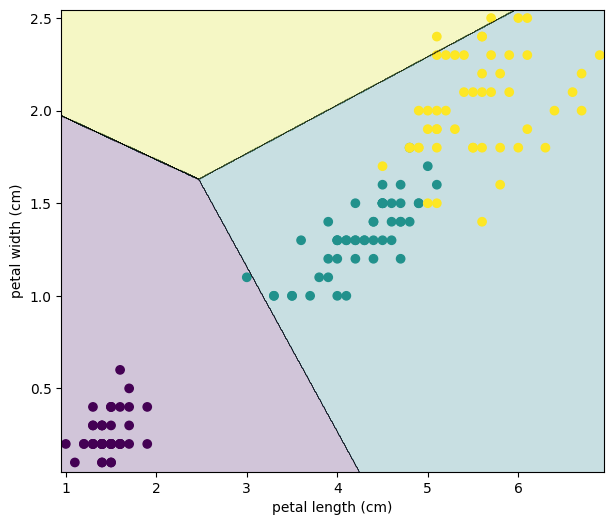

In [145]:
linesvm=LinearSVC(C=0.01, loss='hinge')
linesvm.fit(X_train, y_train)
plot_decision_boundary(linesvm,X,y)

In [146]:
print(linesvm.score(x_test, y_test))

0.5777777777777777


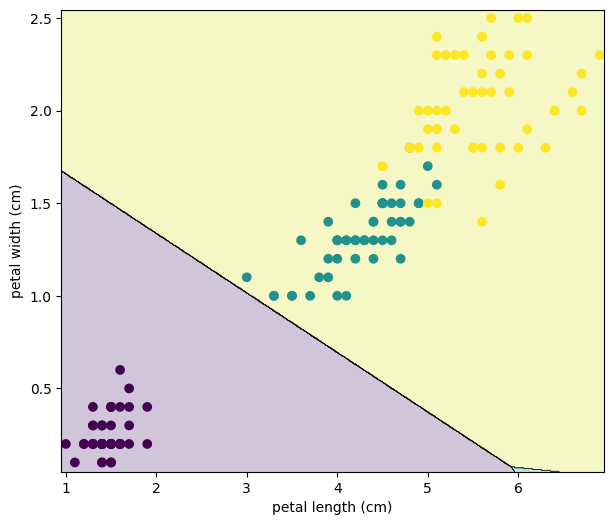

In [147]:
#TODO

linesvm=LinearSVC(C=0.1, loss='hinge')
linesvm.fit(X_train, y_train)
plot_decision_boundary(linesvm,X,y)

In [148]:
print(linesvm.score(x_test, y_test))

0.6666666666666666


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


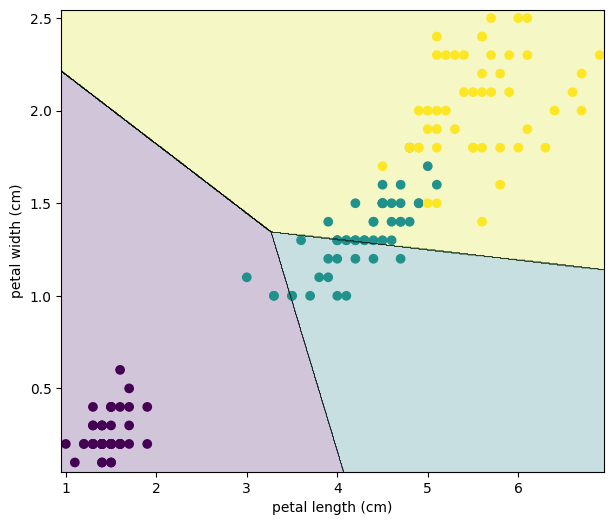

In [149]:
linesvm=LinearSVC(C=1, loss='hinge')
linesvm.fit(X_train, y_train)
plot_decision_boundary(linesvm,X,y)

In [150]:
print(linesvm.score(x_test, y_test))

0.7777777777777778


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


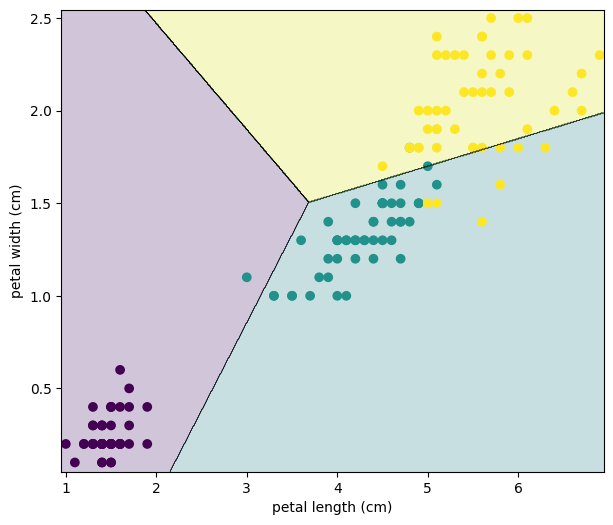

In [151]:
linesvm=LinearSVC(C=10, loss='hinge')
linesvm.fit(X_train, y_train)
plot_decision_boundary(linesvm,X,y)

In [152]:
print(linesvm.score(x_test, y_test))

0.9555555555555556


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


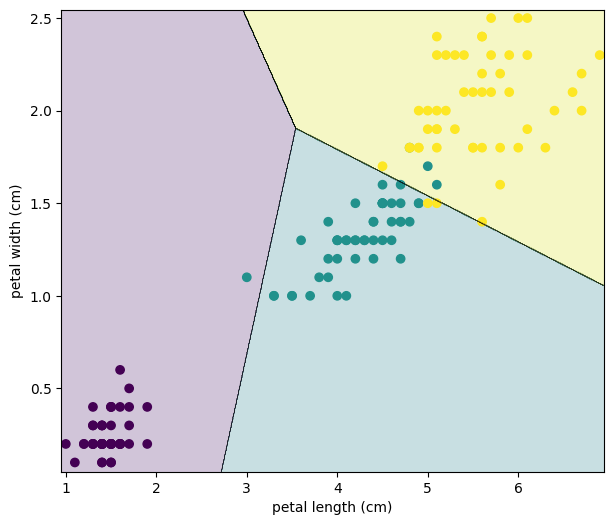

In [153]:
linesvm=LinearSVC(C=100, loss='hinge')
linesvm.fit(X_train, y_train)
plot_decision_boundary(linesvm,X,y)

In [154]:
print(linesvm.score(x_test, y_test))

0.9555555555555556


ถ้า C มีค่ามาก ทำให้ Decision boundary ขยับตามข้อมูลมาก

พยายามแยกจุดให้ถูกทุกจุด ทำให้เกิด overfitting ในโมเดล

ถ้า C มีค่าน้อยเกินไปโมเดลอาจไม่มีประสิทธิภาพ

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

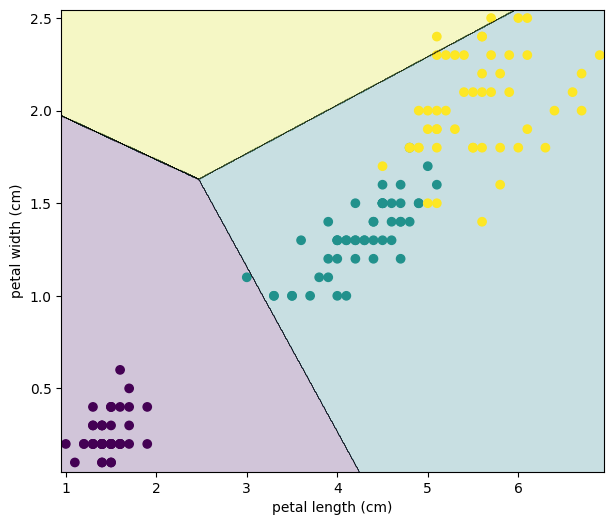

In [155]:
#TODO

linesvm=LinearSVC(C=0.01, loss='hinge')
linesvm.fit(X_train, y_train)
plot_decision_boundary(linesvm,X,y)

In [156]:
print(linesvm.score(x_test, y_test))

0.5777777777777777


In [157]:
test_accuracy = linesvm.score(x_test, y_test)

test_error = 1 - test_accuracy
print(test_error)

0.4222222222222223


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

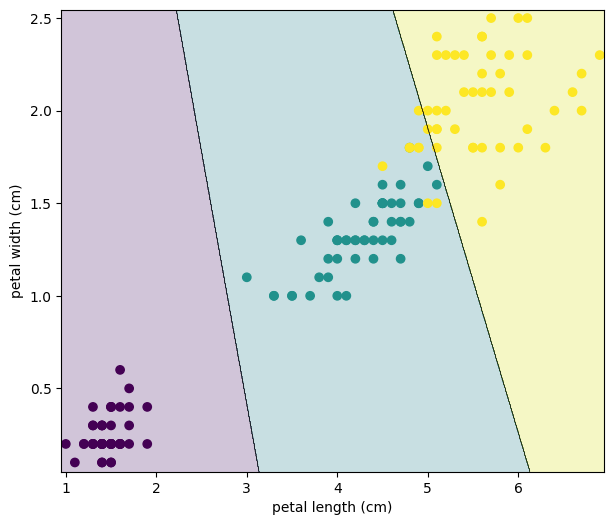

In [158]:
#TODO

svm = SVC(C=1.0, kernel='rbf', gamma=0.01)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, X, y)


In [159]:
print(svm.score(x_test, y_test))

0.9111111111111111


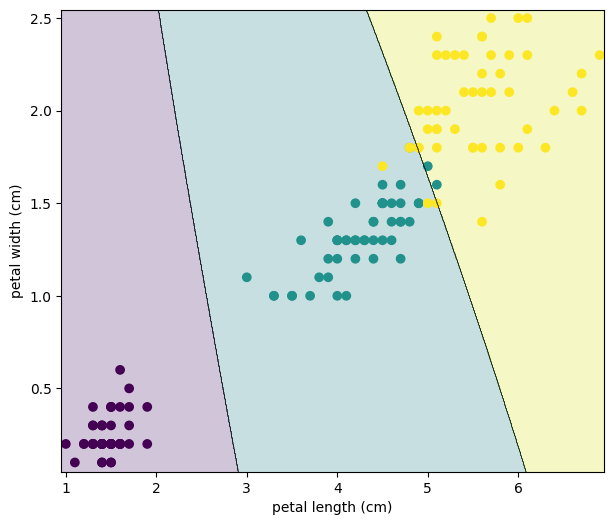

In [160]:
svm = SVC(C=1.0, kernel='rbf', gamma=0.1)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, X, y)

In [161]:
print(svm.score(x_test, y_test))

0.9555555555555556


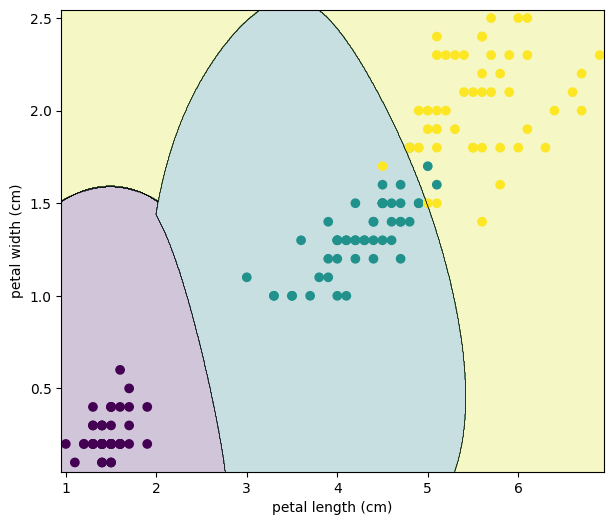

In [162]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, X, y)

In [163]:
print(svm.score(x_test, y_test))

0.9555555555555556


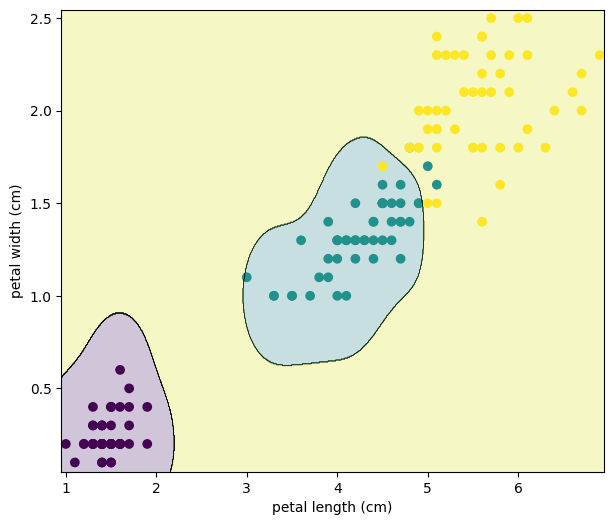

In [164]:
svm = SVC(C=1.0, kernel='rbf', gamma=10)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, X, y)

In [165]:
print(svm.score(x_test, y_test))

0.9555555555555556


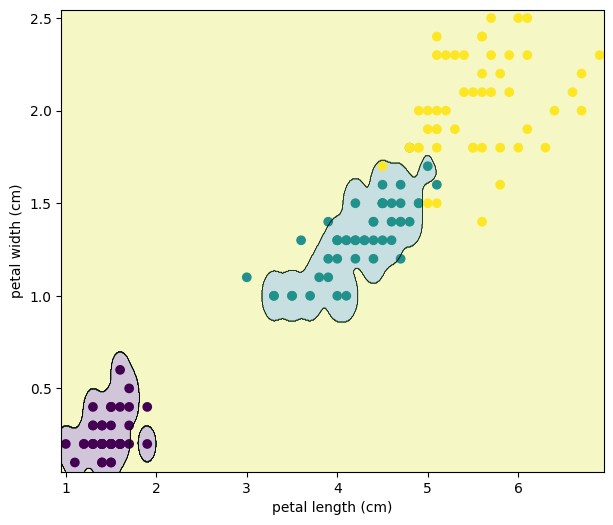

In [166]:
svm = SVC(C=1.0, kernel='rbf', gamma=100)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, X, y)

In [167]:
print(svm.score(x_test, y_test))

0.8444444444444444


ค่า gamma มีค่าน้อยทำให้ decision boundary ง่ายกว่าสามารถจับข้อมูลส่วนหลักๆได้

ค่า gamma มาก ทำให้เส้น decision boundary คดเคี้ยวเกินจำเป็น

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

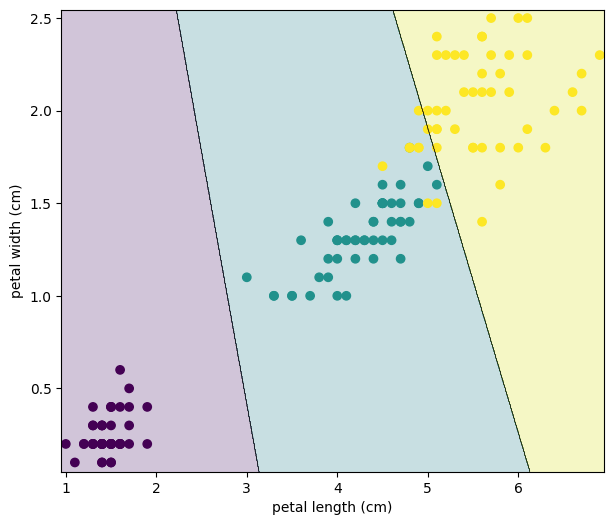

In [168]:
#TODO

svm = SVC(C=1.0, kernel='rbf', gamma=0.01)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, X, y)


In [169]:
print(svm.score(x_test, y_test))

0.9111111111111111


In [170]:
test_accuracy = linesvm.score(x_test, y_test)

test_error = 1 - test_accuracy
print(test_error)

0.4222222222222223


In [171]:
print(f"ค่า Gamma ที่เลือก: 0.01")

ค่า Gamma ที่เลือก: 0.01


In [172]:
num_support_vectors = svm.n_support_.sum()

print(f"จำนวน Support Vectors ทั้งหมด: {num_support_vectors}")

จำนวน Support Vectors ทั้งหมด: 80


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

In [173]:
svm = SVC(C=1.0, kernel='rbf', gamma=10)
svm.fit(X_train, y_train)

linesvm = LinearSVC(C=1.0, loss='hinge', max_iter=100000)
linesvm.fit(X_train, y_train)



LinearSVC(loss='hinge', max_iter=100000)

Text(0.5, 1.0, 'Linear SVM')

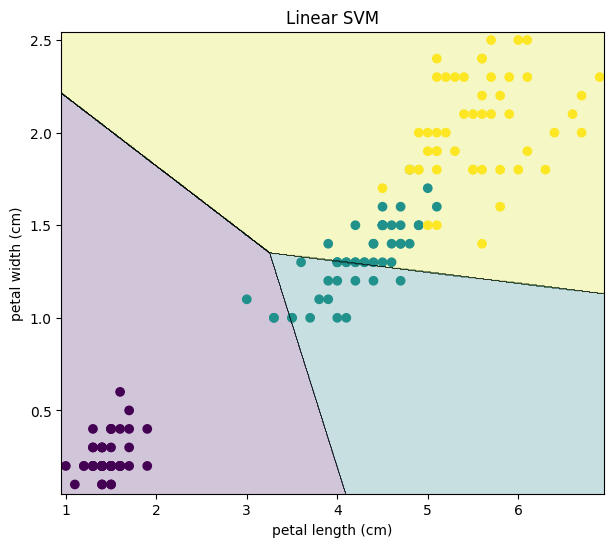

In [174]:
plot_decision_boundary(linesvm, X, y)
plt.title("Linear SVM")


In [175]:
print(linesvm.score(x_test, y_test))

0.7777777777777778


Text(0.5, 1.0, 'Kernel SVM')

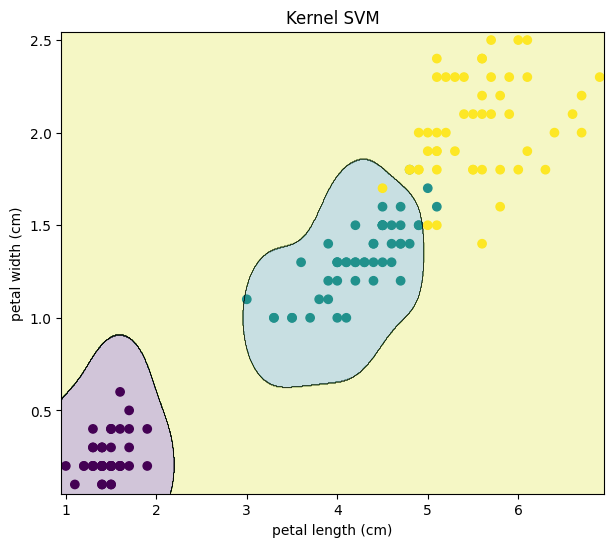

In [176]:
plot_decision_boundary(svm, X, y)
plt.title("Kernel SVM")

In [177]:
print(svm.score(x_test, y_test))

0.9555555555555556


Linear SVM สร้างเส้นแบ่งที่เป็นเส้นตรงซึ่งดูธรรมดาและแบ่งกลุ่มข้อมูลไม่ค่อยละเอียด

Kernel SVM สามารถสร้างเส้นแบ่งที่มีความโค้ง เพื่อล้อมรอบข้อมูลได้ดีกว่า ที่สามารถปรับเปลี่ยนตาม Dynamic รของข้อมูล
